# Q1: Demonstration of Bayesian Inference

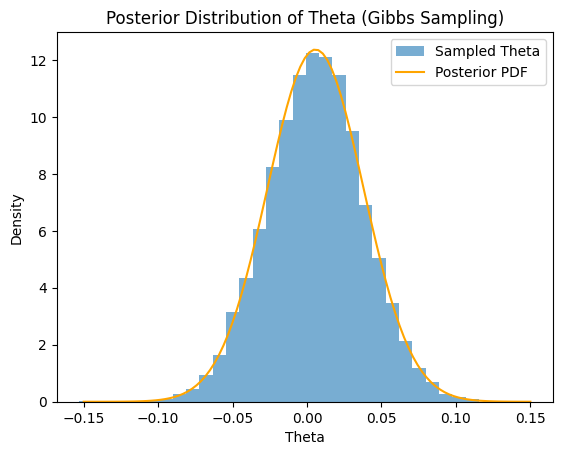

In [3]:
import numpy as np
from scipy.stats import norm, gamma
import matplotlib.pyplot as plt

# Parameters
n = 1000  # Sample size
m = 10000  # Number of samples for theta and tau
s = 1  # Standard deviation for generating x
x = norm(loc=0, scale=s).rvs(size=n)  # Generate sample data
x_mean = x.mean()  # Mean of x

# Initialize chains
theta = np.zeros(m)  # Array to store theta samples
tau = np.zeros(m)  # Array to store tau samples
theta[0] = x_mean  # Initialize theta with the sample mean

# Gibbs sampler
for i in range(1, m):
    # Update tau (Gamma distribution)
    shape = n / 2  # Shape parameter for Gamma
    scale = 1 / (0.5 * np.sum((x - theta[i-1])**2))  # Scale parameter for Gamma
    tau[i] = gamma(a=shape, scale=scale).rvs()  # Sample tau

    # Update theta (Normal distribution)
    mean_theta = x_mean  # Mean of the posterior for theta
    var_theta = 1 / (tau[i] * n)  # Variance of the posterior for theta
    theta[i] = norm(loc=mean_theta, scale=np.sqrt(var_theta)).rvs()  # Sample theta

# Plot posterior samples for theta
plt.hist(theta, bins=30, density=True, alpha=0.6, label='Sampled Theta')
theta_support = np.linspace(-0.15, 0.15, 100)
posterior_pdf = norm.pdf(theta_support, loc=np.mean(theta), scale=np.std(theta))
plt.plot(theta_support, posterior_pdf, color='orange', label='Posterior PDF')
plt.xlabel('Theta')
plt.ylabel('Density')
plt.title('Posterior Distribution of Theta (Gibbs Sampling)')
plt.legend()
plt.show()

# Q2

## i) Derive full conditional distributions

The posterior for τ is : $$
p(\tau \mid \theta, x) \propto p(\tau) \cdot p(x \mid \theta, \tau)
$$

Result in:$$
\tau \mid \theta, x \sim \text{Gamma}\left(\frac{\alpha + n}{2}, \frac{\lambda + \sum_{i=1}^n (x_i - \theta)^2}{2}\right)
$$


The posterior for 𝜃 is: $$
p(\theta \mid \tau, x) \propto p(\theta) \cdot p(x \mid \theta, \tau)
$$

Result in : $$
\theta \mid \tau, x \sim N(\mu_\theta, \sigma_\theta^2)
$$

In which $$
\mu_\theta = \frac{\tau_0^2 \cdot \bar{x} + \tau^{-1} \cdot \theta_0}{\tau_0^2 + n \cdot \tau^{-1}}, \quad \sigma_\theta^2 = \frac{1}{\tau_0^{-2} + n \cdot \tau}
$$

## ii) Explain how to equate $\alpha$ and $\lambda$
$\alpha$: Controls the shape of the Gamma prior on $\tau$, effectively determining the confidence in the prior’s scale.

$\lambda$: Represents the prior contribution to the sum of squared deviations.

Both $\alpha$ and $\lambda$ control how much influence the prior has relative to the data. Larger values increase the prior's contribution, simulating a scenario with more prior data points.

## iii)Updated version of the Gibbs sampler
Ploting prior hyperparameters of 2,10,50

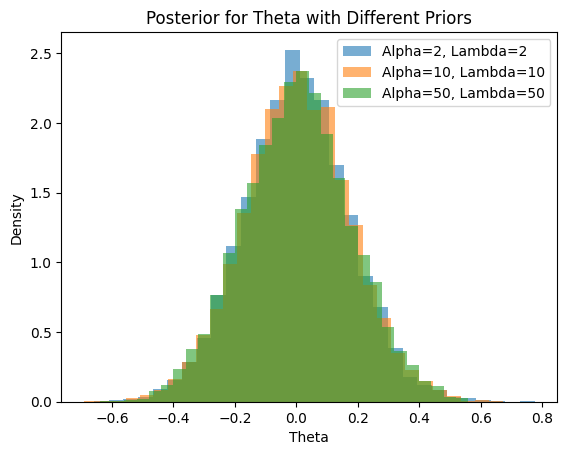

In [4]:
import numpy as np
from scipy.stats import norm, gamma
import matplotlib.pyplot as plt

# Parameters
n = 30  # Sample size
x = norm(loc=0, scale=1).rvs(size=n)  # Simulated data
x_mean = x.mean()  # Mean of x

# Priors
theta_0 = 0  # Prior mean for theta
tau_0_squared = 1  # Prior variance for theta
alpha = 2  # Shape parameter for tau prior
lambd = 2  # Rate parameter for tau prior

# Gibbs Sampler settings
C, G = 2, 10000  # Chains and Gibbs samples
theta = np.zeros((C, G))  # Store theta samples
tau = np.zeros((C, G))  # Store tau samples
theta[:, 0] = theta_0  # Initialize theta with prior mean

# Gibbs Sampling
for c in range(C):
    for g in range(1, G):
        # Update tau from Gamma posterior
        shape = (alpha + n) / 2
        scale = 1 / ((lambd + np.sum((x - theta[c, g - 1])**2)) / 2)
        tau[c, g] = gamma(a=shape, scale=scale).rvs()

        # Update theta from Normal posterior
        mean_theta = (tau_0_squared * x_mean + (1 / tau[c, g]) * theta_0) / (tau_0_squared + n * (1 / tau[c, g]))
        var_theta = 1 / (tau_0_squared**-1 + n * tau[c, g])
        theta[c, g] = norm(loc=mean_theta, scale=np.sqrt(var_theta)).rvs()

# Demonstration of Hyperparameter Influence
# Test different hyperparameter settings
alpha_vals = [2, 10, 50]
lambda_vals = [2, 10, 50]

for alpha, lambd in zip(alpha_vals, lambda_vals):
    tau_chain = np.zeros(G)
    theta_chain = np.zeros(G)
    theta_chain[0] = theta_0  # Re-initialize with prior mean

    for g in range(1, G):
        # Update tau
        shape = (alpha + n) / 2
        scale = 1 / ((lambd + np.sum((x - theta_chain[g - 1])**2)) / 2)
        tau_chain[g] = gamma(a=shape, scale=scale).rvs()

        # Update theta
        mean_theta = (tau_0_squared * x_mean + (1 / tau_chain[g]) * theta_0) / (tau_0_squared + n * (1 / tau_chain[g]))
        var_theta = 1 / (tau_0_squared**-1 + n * tau_chain[g])
        theta_chain[g] = norm(loc=mean_theta, scale=np.sqrt(var_theta)).rvs()

    # Plot the posterior for theta
    plt.hist(theta_chain[200:], bins=30, density=True, alpha=0.6, label=f'Alpha={alpha}, Lambda={lambd}')
    plt.xlabel('Theta')
    plt.ylabel('Density')
    plt.title('Posterior for Theta with Different Priors')

plt.legend()
plt.show()


# Q3:

In this problem, we aim to analyze the posterior distribution of $\lambda$ given a set of observed data $X_{1}$,$X_{2}$...$X_{n}$ drawn i.i.d. from a Bernoulli distribution with parameter $\theta$. The parameter $\theta$ is assumed to follow a Beta distribution prior with parameters
$\alpha$ and $\beta$. Using Bayes' theorem, we calculate the posterior distribution as the product of the likelihood and the prior, normalized by the marginal likelihood.

The likelihood function for the Bernoulli data is given by:$$
p(x_1, \dots, x_n \mid \theta) = \prod_{i=1}^n \theta^{x_i} (1 - \theta)^{1 - x_i}
$$
which simplifies to:$$
p(x_1, \dots, x_n \mid \theta) = \theta^S (1 - \theta)^{n - S}
$$
The Beta prior for $\lambda$  is defined as:$$
p(\theta) = \frac{\theta^{\alpha - 1} (1 - \theta)^{\beta - 1}}{B(\alpha, \beta)}
$$

where $B(\alpha,\beta)$ is the Beta function, ensuring the distribution integrates to 1. Combining the prior and likelihood using Bayes' theorem, the posterior distribution for $\theta$ is proportional to:$$
p(\theta \mid x_1, \dots, x_n) \propto p(x_1, \dots, x_n \mid \theta) \cdot p(\theta)
$$
which simplifies to:$$
p(\theta \mid x_1, \dots, x_n) \propto \theta^{S + \alpha - 1} (1 - \theta)^{n - S + \beta - 1}
$$
Recognizing this as the kernel of a Beta distribution, we conclude that the posterior distribution is:
$$
p(\theta \mid x_1, \dots, x_n) \sim \text{Beta}(\alpha + S, \beta + n - S)
$$

This result demonstrates the conjugacy of the Beta prior with the Bernoulli likelihood, as the posterior distribution is also a Beta distribution. By updating the prior parameters $\alpha$ and $\beta$ with the observed successes
$S$ and failures $n-S$, we effectively incorporate the data into our belief about $\lambda$. This property of conjugacy simplifies Bayesian inference significantly. Next, we validate this result using a Python implementation to simulate the posterior distribution and compare it to the theoretical posterior derived above.

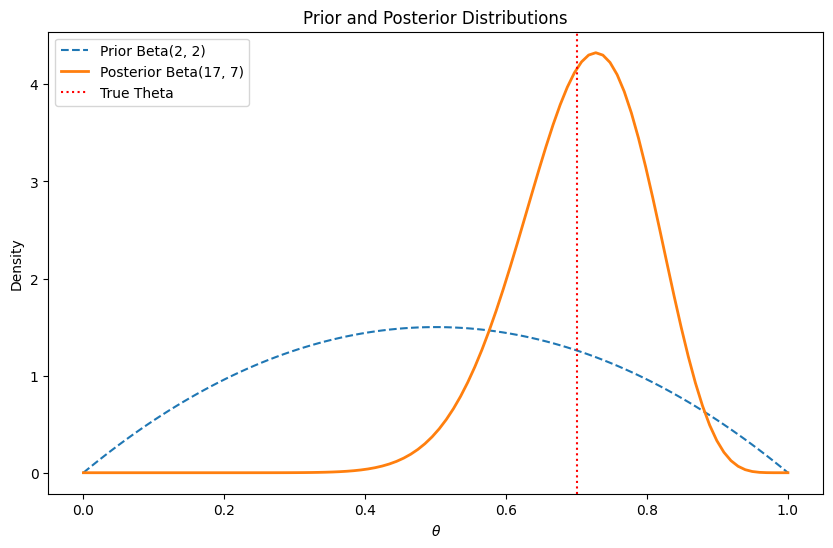

In [6]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

# Simulate Bernoulli data
n = 20  # Number of trials
theta_true = 0.7  # True success probability
x = np.random.binomial(1, theta_true, size=n)  # Observed data

# Prior parameters
alpha_prior = 2  # Shape parameter alpha
beta_prior = 2  # Shape parameter beta

# Sufficient statistic: Number of successes
S = np.sum(x)

# Posterior parameters
alpha_post = alpha_prior + S
beta_post = beta_prior + n - S

# Generate values for theta
theta = np.linspace(0, 1, 100)

# Compute prior and posterior distributions
prior_pdf = beta.pdf(theta, alpha_prior, beta_prior)
posterior_pdf = beta.pdf(theta, alpha_post, beta_post)

# Plot the distributions
plt.figure(figsize=(10, 6))
plt.plot(theta, prior_pdf, label=f'Prior Beta({alpha_prior}, {beta_prior})', linestyle='--')
plt.plot(theta, posterior_pdf, label=f'Posterior Beta({alpha_post}, {beta_post})', linewidth=2)
plt.axvline(theta_true, color='red', linestyle=':', label='True Theta')
plt.xlabel(r'$\theta$')
plt.ylabel('Density')
plt.title('Prior and Posterior Distributions')
plt.legend()
plt.show()
